# Project: Titanic Prediction

<p>Project Description</p>

##### Data Loading & Package Setup

In [39]:
# Importing required libbrairies
%matplotlib inline
from string import ascii_letters
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
# Loading titanic data set & intial preview. 
df = pd.read_csv('/media/fioinvent/cs_experiments/data_science_engineering/titanic_ex/Titanic_ex/data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

##### Data Overview & Descriptive Summary

In [41]:
# Descriptive summary, sata types and data column and feature count using shape.
display(df.shape)
display(df.dtypes)
display(df.describe())

(891, 12)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
# Showing descriptive summary of the object and missing data within our data set
display(df.describe(include='object'))
display(df.isnull().sum())

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Data Pre-Preprocessing

In [43]:
# Dropping duplicates 
# Dropping features with logiclally unusable values based on data composition and missing values 
# Using interpolation teqhniques to fill in (age) feature 
# Turning (Sex) feature into binary representation to use in predictive model (May use package to change when predicting not at this stage for analysis purposes)
# Intialize new df Report preprocessing tasks and preparing for further EDA
# Dropping diplicates 

df_drop_dups = df.drop_duplicates
df_drop_cul = df.drop(columns=['Embarked','Cabin','Name','Ticket','Fare'])
df_int = df_drop_cul.interpolate(method='polynomial', order=2)
df_map = df_int.replace({'male': 1, 'female': 2})
df1 = df_map
df2 = df_int

# Changes Views
display(df1.isnull().sum())
display(df1.columns.is_unique)
display(df2.columns.is_unique)

display(df1.head(20))
display(df2.head(20))


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

True

True

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.000000,1,0
1,2,1,1,2,38.000000,1,0
2,3,1,3,2,26.000000,0,0
3,4,1,1,2,35.000000,1,0
4,5,0,3,1,35.000000,0,0
5,6,0,3,1,56.320363,0,0
6,7,0,1,1,54.000000,0,0
7,8,0,3,1,2.000000,3,1
8,9,1,3,2,27.000000,0,2
9,10,1,2,2,14.000000,1,0


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.000000,1,0
1,2,1,1,female,38.000000,1,0
2,3,1,3,female,26.000000,0,0
3,4,1,1,female,35.000000,1,0
4,5,0,3,male,35.000000,0,0
5,6,0,3,male,56.320363,0,0
6,7,0,1,male,54.000000,0,0
7,8,0,3,male,2.000000,3,1
8,9,1,3,female,27.000000,0,2
9,10,1,2,female,14.000000,1,0


##### Data Analysis and investigation 

<AxesSubplot: >

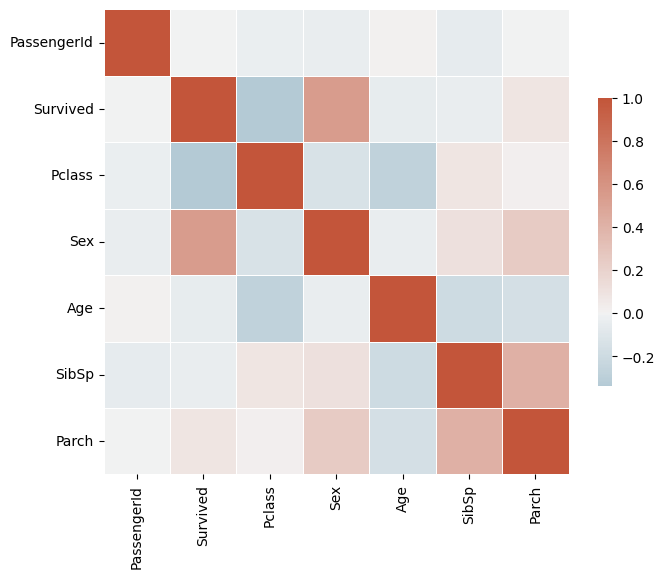

In [53]:
# Utilizing pandas profile_reporting at the end to see if we found the same corrolations or theory proofs.
# Analyzing the linear relationship between all variables
# Deeper analysis and theorization between various variables
# Corrolation Matrix 

corr = df1.corr()
f, ax = plt.subplots(figsize=(7.5, 7.5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

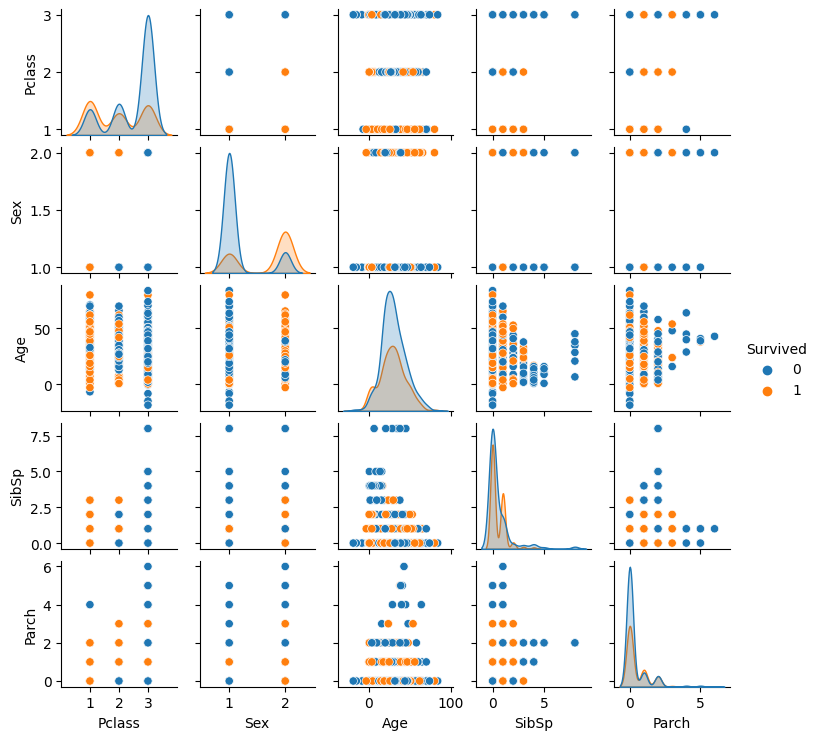

In [70]:
g = sns.pairplot(df1.drop(columns=['PassengerId']), hue="Survived", height=1.5)

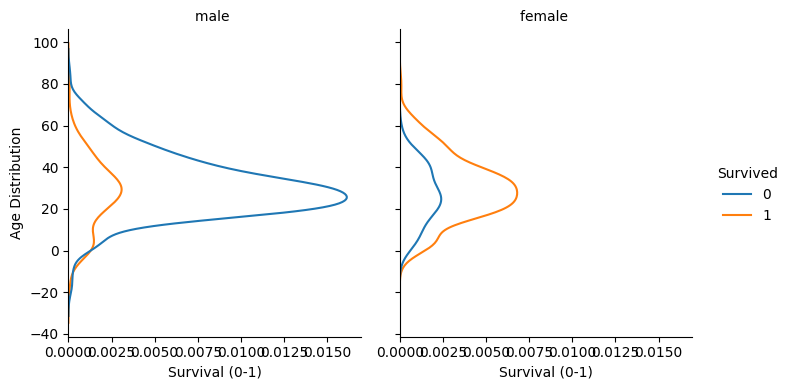

In [47]:
#survival based on Age and Sex
g = sns.displot(
    data=df2, y="Age", hue="Survived", col="Sex",
    kind="kde", height=4, aspect=.9,
)
g.set_axis_labels("Survival (0-1)", "Age Distribution")
g.set_titles("{col_name} ")

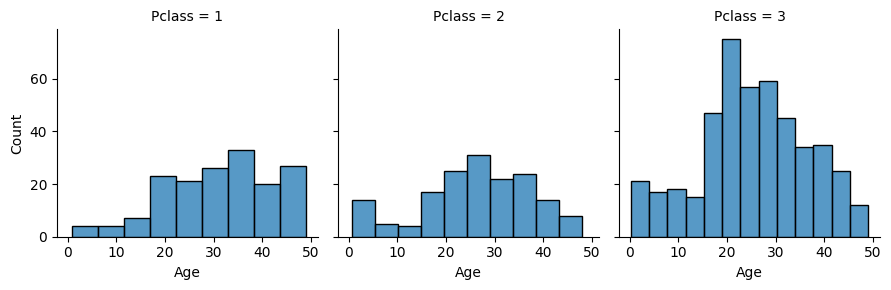

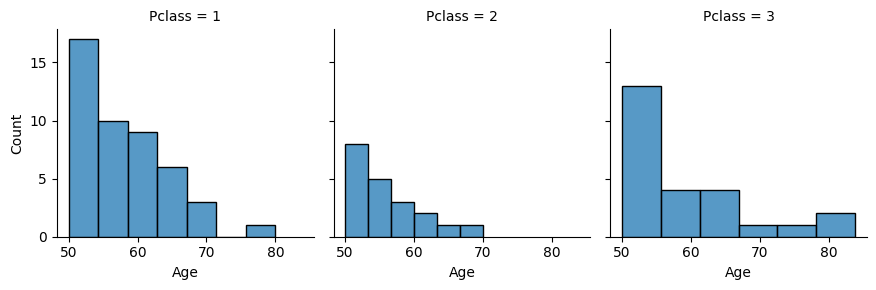

In [48]:
# Query age from 0 - 40 & 40 - 100 to see age based on Pclass
df_qlow = df2.loc[df2['Age'].between(0, 49), ['Age','Pclass']]
df_qhigh = df2.loc[df2['Age'].between(50, 100), ['Age','Pclass']]

# 
g = sns.FacetGrid(df_qlow, col="Pclass")
g.map(sns.histplot, "Age")

g = sns.FacetGrid(df_qhigh, col="Pclass")
g.map(sns.histplot, "Age")

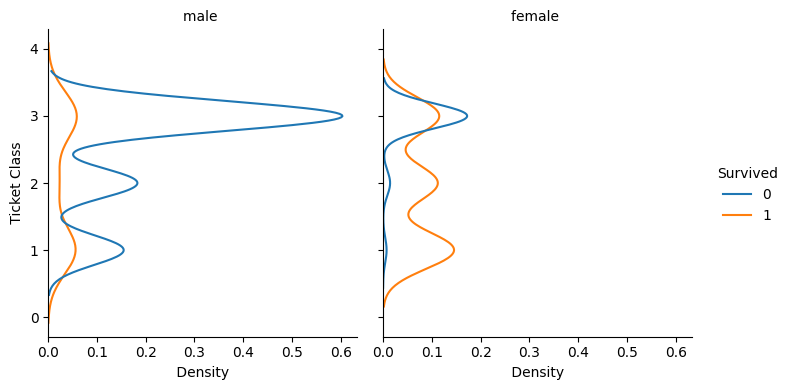

In [62]:
# Survival based on Sex and Pclass
g = sns.displot(
    data=df2, y="Pclass", hue="Survived", col="Sex",
    kind="kde", height=4, aspect=.9,
)
g.set_axis_labels(" Density ", " Ticket Class ")
g.set_titles("{col_name} ")


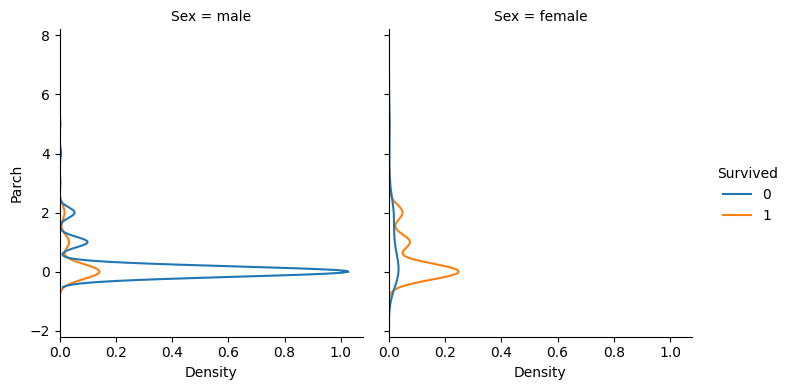

In [67]:
# Survival Based on Parch and Sex
sns.displot(
    data=df2, y="Parch", hue="Survived", col="Sex",
    kind="kde", height=4, aspect=.9,
)
g.set_axis_labels("Density", "Ticket Class")
g.set_titles("{col_name}")

## Machine Learning 

##### Building ML Model